In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from functions import criar_Perceptron,criar_MLP,dividir_dados
import os
import seaborn as sns

2025-01-23 16:17:51.181586: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-23 16:17:51.200119: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-23 16:17:51.205406: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-23 16:17:51.216742: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
dados = pd.read_csv("dados/dados_imperfeito_normal.csv")
del dados['Unnamed: 0']
dados

,comprimento de onda,cor
0,452.198239,azul
1,460.495112,azul
2,458.205358,azul
3,454.637098,azul
4,469.669731,azul
...,...,...
195,596.248438,verde
196,583.212146,verde
197,595.541771,verde
198,586.513608,verde


In [3]:
# Cria a camada de normalização
normalization_layer = keras.layers.Normalization(axis=-1)

# Adapta a camada aos dados (necessário para calcular a média e o desvio padrão)
normalization_layer.adapt(dados['comprimento de onda'].values.reshape(-1, 1))

I0000 00:00:1737659873.578229   13218 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1737659873.618654   13218 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1737659873.618876   13218 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1737659873.619830   13218 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

InternalError: cudaSetDevice() on GPU:0 failed. Status: out of memory

In [21]:
encoder = OneHotEncoder()
cor_encoded = encoder.fit_transform(dados['cor'].values.reshape(-1,1))
cor_encoded.toarray()

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [22]:
dados['cor encoded'] = cor_encoded.toarray()[:,0].copy()
dados

,comprimento de onda,cor,cor encoded
0,452.198239,azul,1.0
1,460.495112,azul,1.0
2,458.205358,azul,1.0
3,454.637098,azul,1.0
4,469.669731,azul,1.0
...,...,...,...
195,596.248438,verde,0.0
196,583.212146,verde,0.0
197,595.541771,verde,0.0
198,586.513608,verde,0.0


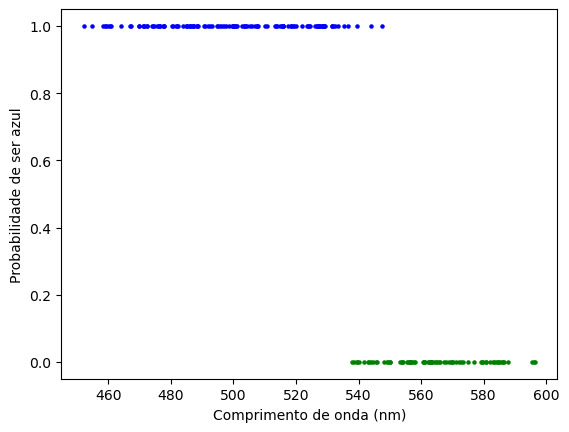

In [23]:
azul = dados[dados['cor']=='azul']
verde = dados[dados['cor']=='verde']

plt.scatter(azul['comprimento de onda'],azul['cor encoded'],color='blue',s=5)
plt.scatter(verde['comprimento de onda'],verde['cor encoded'],color='green',s=5)
plt.ylabel('Probabilidade de ser azul')
plt.xlabel('Comprimento de onda (nm)')
plt.savefig('imagens/conjunto de dados com ruído gaussiano.png')

In [24]:
dados

,comprimento de onda,cor,cor encoded
0,452.198239,azul,1.0
1,460.495112,azul,1.0
2,458.205358,azul,1.0
3,454.637098,azul,1.0
4,469.669731,azul,1.0
...,...,...,...
195,596.248438,verde,0.0
196,583.212146,verde,0.0
197,595.541771,verde,0.0
198,586.513608,verde,0.0


In [25]:
x_train,y_train,x_test,y_test,strat_train_set,strat_test_set = dividir_dados(dados)

In [26]:
learning_rate_exponent = 3

path_perceptron = f'modelos/perceptron_gaussiano_{learning_rate_exponent}.keras'
path_mlp = f'modelos/MLP_gaussiano_{learning_rate_exponent}.keras'

if not os.path.exists(path_mlp):
    MLP = criar_MLP(x_train, strat_train_set, 1 / 10**learning_rate_exponent)
    MLP.save(path_mlp)
else:
    MLP = keras.models.load_model(path_mlp)
if not os.path.exists(path_perceptron):
    Perceptron = criar_Perceptron(x_train,strat_train_set,learning_rate=1/10**learning_rate_exponent)
    Perceptron.save(path_perceptron)
else:
    Perceptron = keras.models.load_model(path_perceptron)

In [27]:
MLP.fit(x_train,y_train,epochs=100)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1004 - loss: 0.7003  
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5499 - loss: 0.6925 
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9707 - loss: 0.6856 
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9850 - loss: 0.6779 
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9915 - loss: 0.6722 
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9837 - loss: 0.6648 
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9850 - loss: 0.6581 
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9868 - loss: 0.6525 
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9773 - loss: 0.6466 
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9881 - loss: 0.6393 
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9664 - loss: 0.6352 
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9881 - lo

In [28]:
Perceptron.fit(x_train,y_train,epochs=100)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1203 - loss: 0.8914  
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1437 - loss: 0.8928 
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1320 - loss: 0.8878 
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0990 - loss: 0.8932 
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1212 - loss: 0.8851 
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step - accuracy: 0.1003 - loss: 0.8849
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1172 - loss: 0.8840 
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1107 - loss: 0.8860 
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1072 - loss: 0.8747 
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1389 - loss: 0.8613 
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1324 - loss: 0.8595 
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1319 - l

In [29]:
np.argmax(Perceptron.predict(x_test),axis=1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [30]:
resultado = np.argmax(y_test,axis=1)
predito = np.argmax(MLP.predict(x_test),axis=1)


# Calcula a acurácia diretamente
accuracy = np.mean(resultado == predito)
print(f"Acurácia com mlp: {accuracy}")

predito = np.argmax(Perceptron.predict(x_test),axis=1)

accuracy = np.mean(resultado==predito)

print(f'Acurácia do Perceptron: {accuracy}')


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/stepWARNING:tensorflow:5 out of the last 45 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x762e7972efc0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Acurácia com mlp: 0.925
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Acurácia do Perceptron: 0.625


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


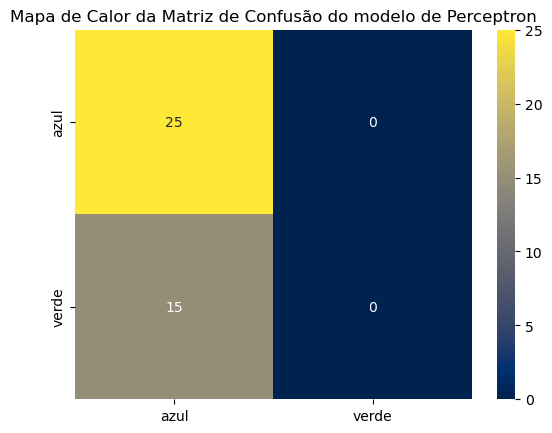

In [31]:
labels = ('azul','verde')
predito = np.argmax(Perceptron.predict(x_test),axis=1)
sns.heatmap(confusion_matrix(resultado,
                             predito),
                             xticklabels=labels,
                             yticklabels=labels,annot=True,
                             cmap='cividis',
                             )
title = "Mapa de Calor da Matriz de Confusão do modelo de Perceptron"
plt.title(title)
plt.savefig(f'imagens/{title}_normal.png')

In [32]:
predito = np.argmax(MLP.predict(x_test),axis=1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [ ]:
labels = ('azul','verde')
predito = np.argmax(MLP.predict(x_test),axis=1)
sns.heatmap(confusion_matrix(resultado,
                             predito),
                             xticklabels=labels,
                             yticklabels=labels,annot=True,
                             cmap='cividis',
                             )
title = "Mapa de Calor da Matriz de Confusão do modelo de MLP"
plt.title(title)
plt.savefig(f'imagens/{title}_normal.png')

NameError: name 'np' is not defined

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 758us/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 631us/step


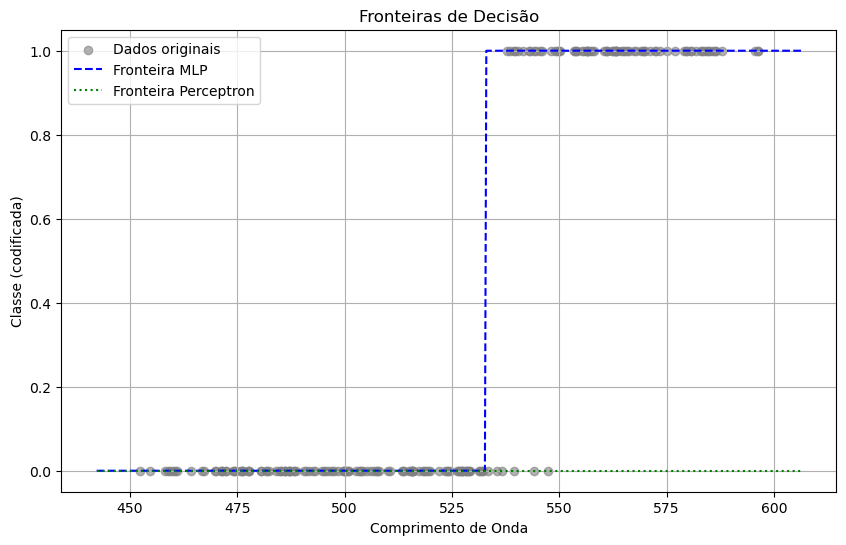

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Gera uma malha de pontos
x_min, x_max = dados['comprimento de onda'].min() - 10, dados['comprimento de onda'].max() + 10
xx = np.linspace(x_min, x_max, 500).reshape(-1, 1)

# Predição para os modelos
mlp_pred = np.argmax(MLP.predict(xx), axis=1)
perceptron_pred = np.argmax(Perceptron.predict(xx), axis=1)

# Converte as classes para rótulos
encoder = LabelEncoder()
encoder.fit(['azul', 'verde'])

# Plota as fronteiras de decisão
plt.figure(figsize=(10, 6))
plt.scatter(dados['comprimento de onda'], encoder.transform(dados['cor']), c='gray', label='Dados originais', alpha=0.6)
plt.plot(xx, mlp_pred, label="Fronteira MLP", color="blue", linestyle="--")
plt.plot(xx, perceptron_pred, label="Fronteira Perceptron", color="green", linestyle=":")
plt.title("Fronteiras de Decisão")
plt.xlabel("Comprimento de Onda")
plt.ylabel("Classe (codificada)")
plt.legend()
plt.grid(True)
plt.savefig("imagens/fronteiras_decisao.png")
plt.show()
